<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/iris_pca-transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo PCA

El dataset clásico que se utiliza para explicar esta técnica es un viejo conocido para nosotros, el de clasificación de iris. En Kaggle, Github o webs de machine learning y ciencia de datos podemos encontrar distintas versiones de este ejemplo, lo cual siempre es interesante para comparar y aprender.

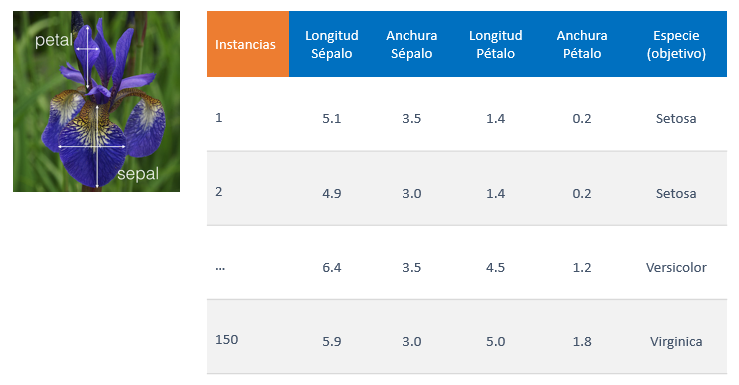

2. Los 5 pasos del proceso PCA.
Los pasos que vamos a dar y que explicaremos detalladamente son los siguientes:

1.- Cargar los datos  
2.- Normalizarlos  
3.- Obtener los autovectores y autovalores a partir de la matriz de covarianza  
4.- Seleccionar los autovectores correspondientes a las componentes principales  
5.- Proyectar el dataset original sobre el nuevo espacio de dimensión < 4

##2.1 Carga de los datos y librerías  
En este primer paso, cargamos las librerías que vamos a usar, cargamos el conjunto de datos (desde el repositorio UCI) en un dataframe df , y les echamos un vistazo con el último comando. Obtenemos la siguiente representación de los datos:

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

df.head()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# Se divide la matriz del dataset en dos partes

X = df.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas

y = df.iloc[:,4].values
# El vector y contiene los valores de la 4 columna (especie)para todas las filas

##2.2 Normalización.  
Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de normalizar sus valores. En este caso, en el que las medidas de sépalos y pétalos están expresadas en centímetros, no sería imprescindible. Sin embargo,  al aplicar PCA se asume que los datos de trabajo tienen una distribución gaussiana o normal. Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1. Para ello, usaremos la transformación Standardscaler de sklearn.

<p align="center">
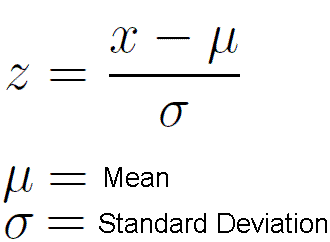
</p>




In [76]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
X_std = scal.fit_transform(X)

##2.3 Cálculo de autovectores y autovalores (eigenvector/eigenvalue).  

En la clase de teoría explicamos que los autovectores son las direcciones en las que la varianza de los datos es mayor. Recordemos que, en teoría de probabilidad, la varianza de una variable aleatoria es una medida de dispersión (definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media). Por tanto, las direcciones en las que la varianza es mayor, representan la esencia principal de la información contenida en el dataset, por eso se les llama componentes principales. Al igual que un autovector es una dirección, el autovalor es un número, que representa el valor de la varianza sobre ese autovector. Por ello, para encontrar las componentes principales que condensen esa esencia de la información del dataset, calcularemos primero la matriz de covarianza, que nos da la medida de dispersión conjunta entre variables.

Para ello, usaremos la función Covariance Matrix de la librería Numpy.

In [77]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Como vimos en clase, las direcciones sobre las que la varianza es mayor (=mayor dispersión de los datos=mayor información) se corresponden con los autovectores, vectores propios o eigenvectors de esta matriz. Por tanto, el siguiente paso consiste en calcular estas direcciones.

In [78]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [79]:
# Primer autovector
eig_vecs[:,0:1]

array([[ 0.52237162],
       [-0.26335492],
       [ 0.58125401],
       [ 0.56561105]])

Si lo que queremos es reducir la dimensionalidad del dataset, perdiendo la menor información posible, descartaremos los autovectores cuyos autovalores sean más bajos, ya que son aquellos que menos información aportan al conjunto global. Para ello, lo que se hace es ordenarlos por parejas de autovector, autovalor.

In [80]:
#  Hacemos una lista de parejas (autovector, autovalor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendente:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


##**Relación de las componentes proncipales con las variables originales**

La primera componente principal (autovector) tiene  valores

[0.52237162,
       -0.26335492,
       0.58125401,
       0.56561105]
       
##esto implica que:
$$PC1 = 0.52 LongSépalo  -0.26 AnchoSépalo +0.58 LongPétalo +0.56 AnchoPétalo $$  


## 2.4 Seleccionamos los los autovectores correspondientes a las componentes principales.

El objetivo de este caso es proyectar este dataset 4D, en un espacio de menor dimensionalidad, para mejorar la eficiencia de cálculo, al mismo tiempo que se retiene la mayor parte de la información. La pregunta clave será ¿cuál va ser este valor? ¿3D?¿2D?¿1D?. Para ello seguiremos el siguiente proceso.

Una vez ordenados los autovalores, que recordamos son una medida de la varianza de los datos, la cuestión es decidir, cuál es el menor número de autovectores o componentes principales, con el que podemos expresar “la esencia principal” de la información contenida en ese dataset. Para ello, usaremos un métrica que se conoce como **“varianza explicada”**, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

<center>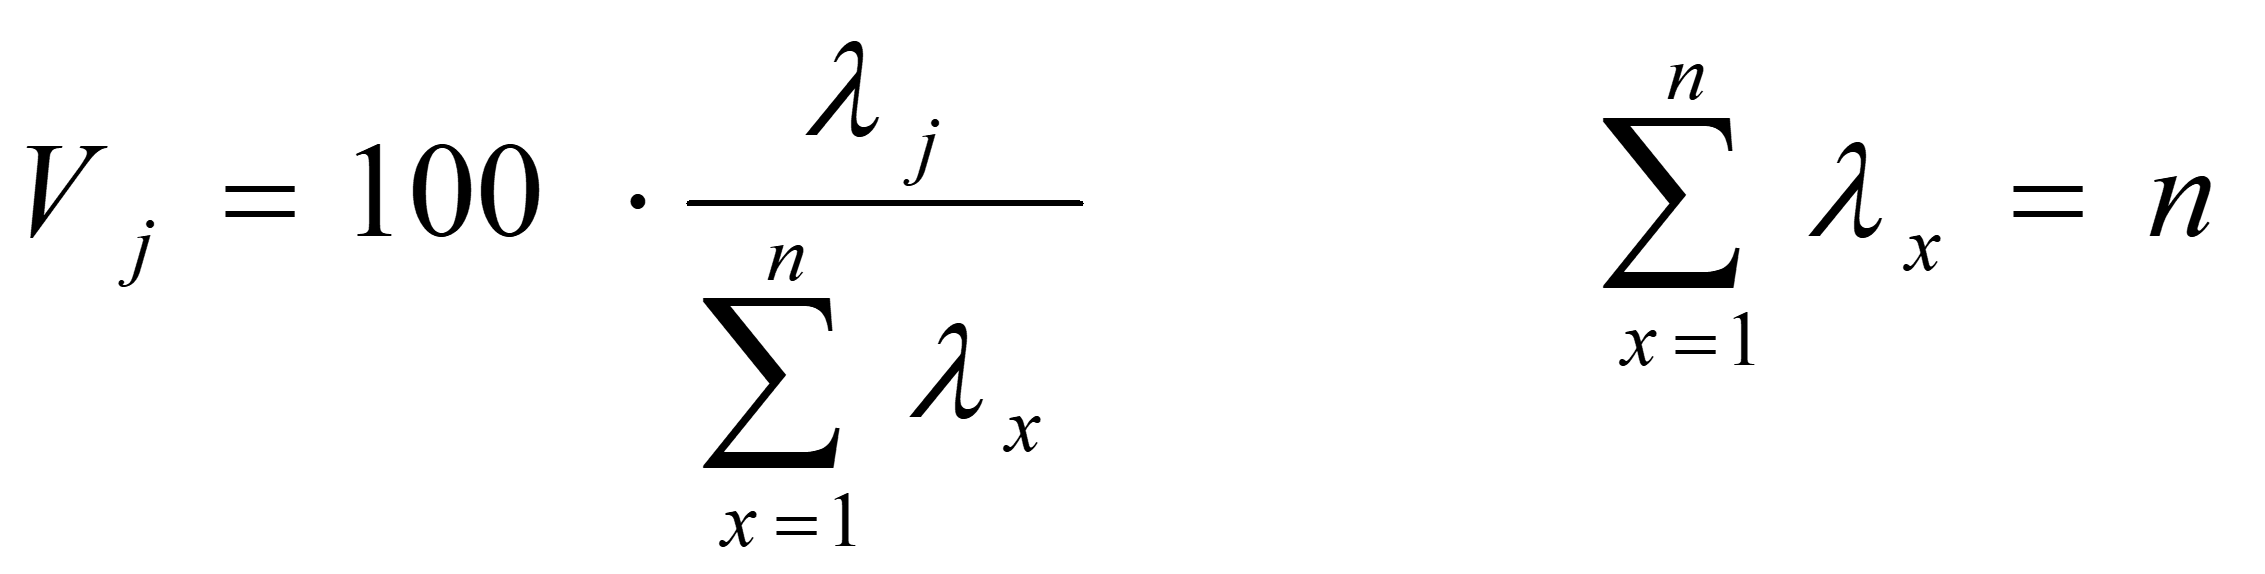</center>

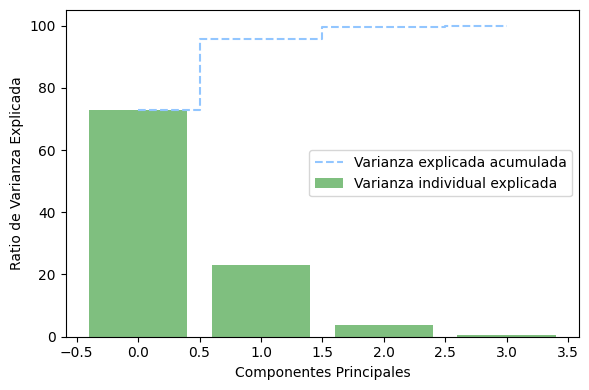

In [81]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-v0_8-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

En la gráfica se aprecia claramente que la mayor parte de la varianza (en torno al 70%) corresponde a la primera componente. La segunda acumula algo más del 20% de la varianza, mientras que la tercera puede ser descartada sin perder demasiada información, ya que las dos primeras componentes explican más del 90% de la varianza.

In [82]:
#se podría hacer
idx = np.argsort(eig_vals, axis=0)[::-1]
sorted_eig_vecs = eig_vecs[:, idx]

([<matplotlib.axis.XTick at 0x7ddcb409b260>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

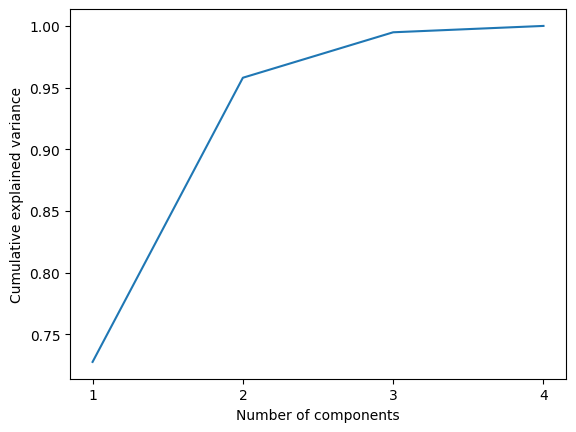

In [83]:
cumsum = np.cumsum(eig_vals[idx]) / np.sum(eig_vals[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
#plt.xlim(1, 4, 1)

2.5 Proyectamos los datos sobre un espacio de dimensionalidad menor.  

En este ejemplo, construiremos una matriz de proyección que convertirá el conjunto de datos inicial (de 4D) en un conjunto de datos de 2D centrado en las sus componentes principales (las direcciones de los autovectores correspondientes). De esta forma, la tarea de interpretar los patrones de información contenidos en los datos, será mucho más sencilla. Para ello, primero creamos la matriz de proyección a partir de los autovalores principales con el siguiente código:

image.png

In [84]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


Y, por último, representamos gráficamente el nuevo espacio de datos, con éstas últimas líneas

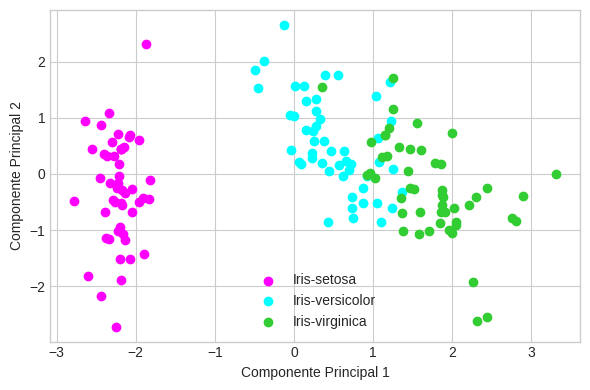

In [85]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

 Hemos conseguido reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos dimensiones que aún así conserva la información más esencial. de forma que nos resultará mucho más sencillo el trabajo de crear un modelo de clasificación a partir de estos datos. Como ya indicamos anteriormente, es una técnica muy frecuente, ya que es sencilla y facilita mucho el trabajo posterior.

In [89]:
#Generamos la matríz a partir de los pares autovalor-autovector
print(eig_vecs)
print(eig_vecs.shape)

Y = np.dot(X_std,eig_vecs)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
(4, 4)


In [ ]:
# Reverse PCA transformation
from sklearn.preprocessing import StandardScaler
#mu = np.mean(X, axis=0)
# Use the fitted scaler object to inverse transform
mu =  scal.inverse_transform(X_std) # Use the fitted scaler object

mu.shape
print(X_std[0:3,0:4])
print(mu[0:5,0:5])

In [90]:
print(Y.shape)
print(Y[0:5,0:5])

(150, 4)
[[-2.26454173 -0.5057039  -0.12194335  0.02307332]
 [-2.0864255   0.65540473 -0.22725083  0.10320824]
 [-2.36795045  0.31847731  0.05147962  0.02782523]
 [-2.30419716  0.57536771  0.09886044 -0.06631146]
 [-2.38877749 -0.6747674   0.02142785 -0.03739729]]


In [91]:
Xhat = np.dot(Y,eig_vecs) # Use the first two eigenvectors
Xhat.shape

print(Xhat[0:5,0:5])
print(X_std[0:5,0:5])
X_orig = Xhat+X_std
print(X_orig[0:3,0:4])

[[-1.10758226  1.31225101  1.50781871 -0.4207491 ]
 [-1.33620826  0.16824278  1.696373   -0.39189555]
 [-1.27516169  0.58395653  1.8093028  -0.68660202]
 [-1.33521659  0.32761197  1.77252316 -0.78903224]
 [-1.07882356  1.51591543  1.5383494  -0.57883326]]
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
[[-2.00826343  2.34430823  0.16654631 -1.73372582]
 [-2.47922517  0.04328518  0.35510059 -1.70487228]
 [-2.66051434  0.92180486  0.4111647  -1.99957874]]


For doing it manually, and truncating dimensions, data_reduced = np.dot(data, pca.components_.T[:,:dim]), and back data_original = np.dot(data_reduced, pca.components_[:dim, :])



import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)

data_reduced = np.dot(data, pca.components_.T) # transform
data_original = np.dot(data_reduced, pca.components_) # inverse_transform

